# Вступительное испытание **Модуль искуственного интеллекта**

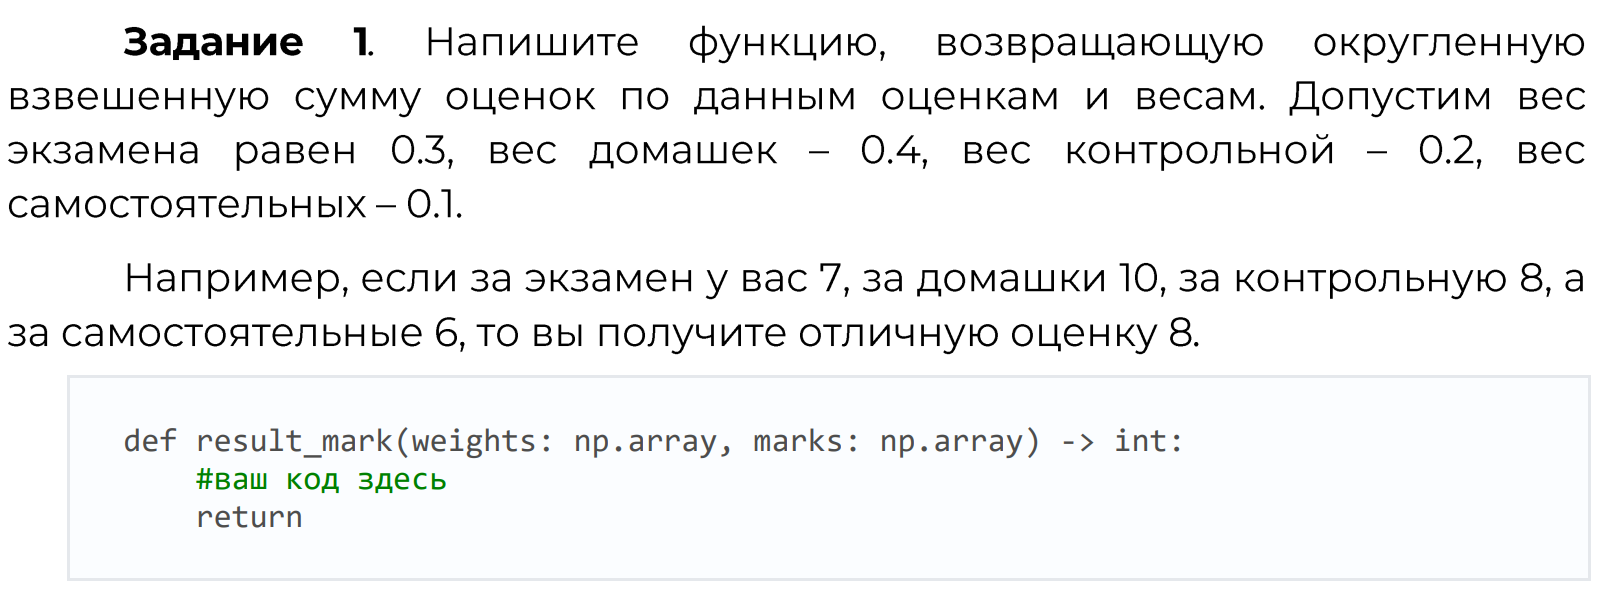

In [3]:
import numpy as np
def result_mark(weights: np.array, marks: np.array) -> int:
  return int((weights * marks).sum().round())

In [4]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 10, 8, 6])
result_mark(weights, marks)

8

# Вступительное испытание **Модуль искуственного интеллекта** или **Модуль Синтеза речи**

## **Задача кредитного скоринга**

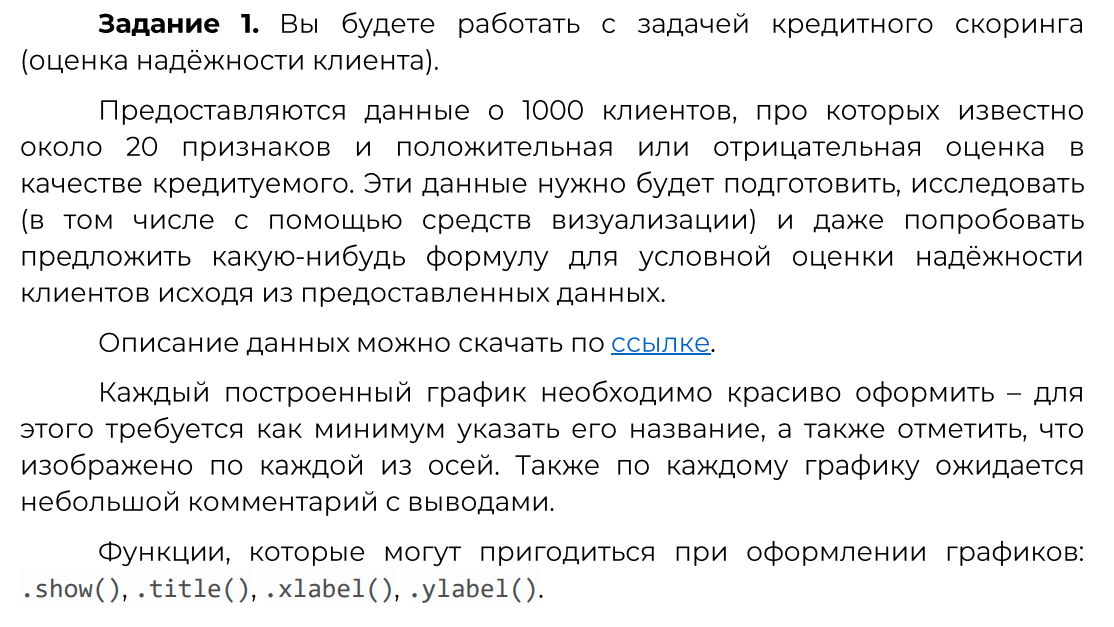

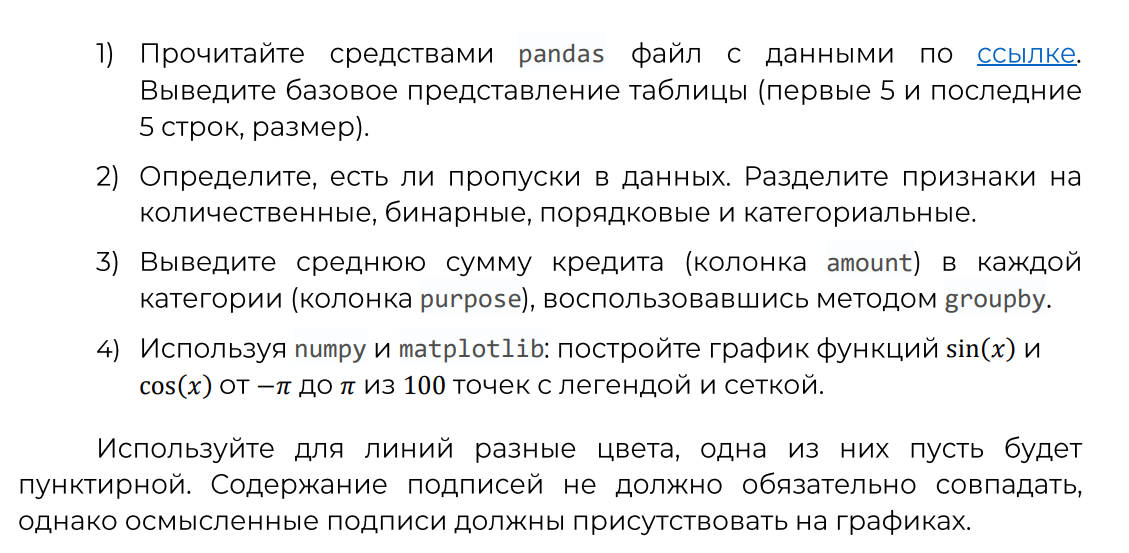

# **Считаем данные**

In [5]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv', delimiter=',')

# **Выведем первые 5 строк, последние 5 строк и размер датасета**

In [16]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [9]:
df.tail()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [11]:
df.shape

(1000, 21)

# **Посмотрим общую информацию о датасете**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [19]:
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [15]:
df.describe()

,duration,amount,age
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


## Как минимум пустых значений нет, а в числовых данных нет выбросов, которые могли бы навести на мысль о заполнении большими числами вместо пустых строк. 
##Однако такого в данном датасете не наблюдается.

In [18]:
df['other_debtors'].unique()

array(['none', 'guarantor', 'co-applicant'], dtype=object)

## Может показаться, что в признаках 'other_debsrors' и 'other_installment_plans' присутсвует слово **none**, но это умышленное название, опираясь на описание датасета.

In [17]:
df.nunique()

status                       4
duration                    33
credit_history               5
purpose                     10
amount                     923
savings                      5
employment_duration          5
installment_rate             4
personal_status_sex          4
other_debtors                3
present_residence            4
property                     4
age                         53
other_installment_plans      3
housing                      3
number_credits               4
job                          4
people_liable                2
telephone                    2
foreign_worker               2
credit_risk                  2
dtype: int64

###Заметим, что признаки с только с двумя вариантами классификации являются бинарными. 
# **Разделим датасет на бинарные, количественные и качественные признаки.**

In [21]:
numeric_indices = np.array([1, 4, 12]) #количественные
categorical_indices = np.array([0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16]) #Качественные
binary_indices = np.array([17, 18, 19, 20]) #бинарные

## Проверим, что все верно выводится

In [22]:
numeric_data = df[df.columns[numeric_indices]]
numeric_data.head()

,duration,amount,age
0,18,1049,21
1,9,2799,36
2,12,841,23
3,12,2122,39
4,12,2171,38


In [23]:
categorical_data = df[df.columns[categorical_indices]]
categorical_data.head()

,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,other_installment_plans,housing,number_credits,job
0,no checking account,all credits at this bank paid back duly,car (used),unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,>= 7 yrs,car or other,none,for free,1,skilled employee/official
1,no checking account,all credits at this bank paid back duly,others,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,none,for free,2-3,skilled employee/official
2,... < 0 DM,no credits taken/all credits paid back duly,retraining,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,>= 7 yrs,unknown / no property,none,for free,1,unskilled - resident
3,no checking account,all credits at this bank paid back duly,others,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,none,for free,2-3,unskilled - resident
4,no checking account,all credits at this bank paid back duly,others,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,>= 7 yrs,car or other,bank,rent,2-3,unskilled - resident


In [25]:
binary_data = df[df.columns[binary_indices]]
binary_data.head()

,people_liable,telephone,foreign_worker,credit_risk
0,0 to 2,no,no,good
1,3 or more,no,no,good
2,0 to 2,no,no,good
3,3 or more,no,yes,good
4,0 to 2,no,yes,good


# **Выведем среднюю сумму кредита в каждой категории колонки purpose**

In [26]:
df.groupby(['purpose']).agg({'amount':{np.mean}}).round(2)

,amount
,mean
purpose,
business,8209.33
car (new),5370.22
car (used),3066.98
domestic appliances,2728.09
furniture/equipment,2487.69
others,3062.95
radio/television,1498.00
repairs,3180.40


### **В среднем в топ больших сумм на кредит входят:**
### **деньги на бизнес, деньги на машину и деньги на переобучение.**

# **Построим график синуса и косинуа**

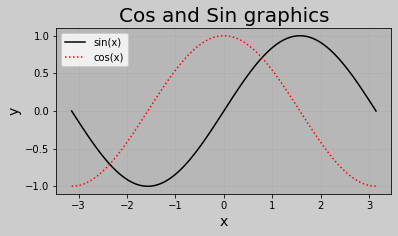

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = np.linspace(-np.pi,np.pi,100)
ax.plot(x, np.sin(x), color="black", linestyle='-')
ax.plot(x, np.cos(x), color="red", linestyle=':')

ax.patch.set_facecolor('black')
ax.patch.set_alpha(.1)
fig.patch.set_facecolor('black')
fig.patch.set_alpha(.2)

ax.grid()
ax.legend(['sin(x)', 'cos(x)'])
plt.title('Cos and Sin graphics', fontsize=20)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.subplots_adjust(top=0.7)

## **Немного поиследуем наш датасет**

# Выдвинем некоторые **гипотезы**:

##1. **Чем больше возраст**, *тем вероятнее быть хорошим заемщиком;*
##2. **Чем лучше уровень работы,** *тем больше вероятность получить кредит.*
##3. **Чем меньше сумма кредита**, *тем выше вероятность быть хорошим заемщиком;*
##4. **Чем больше продолжительность занятости**, *тем вероятнее быть хорошим заемщиком;*
##5. **Людям с собственным жильем** *вероятнее всего одобрят кредит;*
##6. **Чем выше сбережения,** *тем вероятнее одобрят кредит;*
##7. **Чем меньше сущеcтвующих кредитов**, *тем выше вероятность одобрить кредит;*
##8. **Чем больше длительность кредита**, *тем больше вероятность его одобрения;*
##9. **Чем лучше кредитная история**, *тем вероятнее получить кредит;*
##10. **Если это иностранец,** *вероятность получить кредит* **меньше**;



# **Корреляция между числовыми данными**

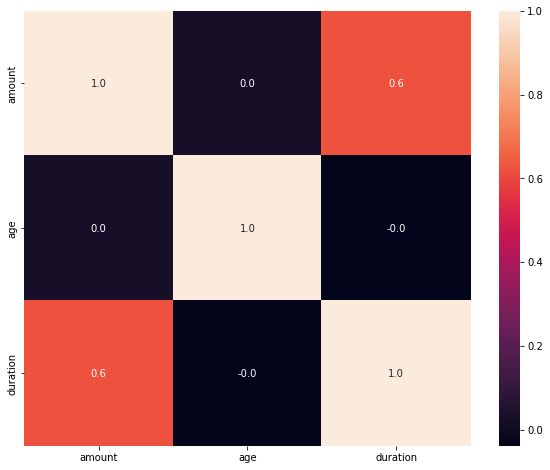

In [100]:
plt.figure(figsize=(10, 8))
num_cols = ['amount', 'age', 'duration']

sns.heatmap(X[num_cols].corr(method='spearman'), annot=True, fmt=".1f")

## **+- положительная зависимость длительности периода кредита и суммы кредита, вполне логичная, но не сильно явная**

# 1. **Возраст**

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05]),
 <a list of 6 Text major ticklabel objects>)

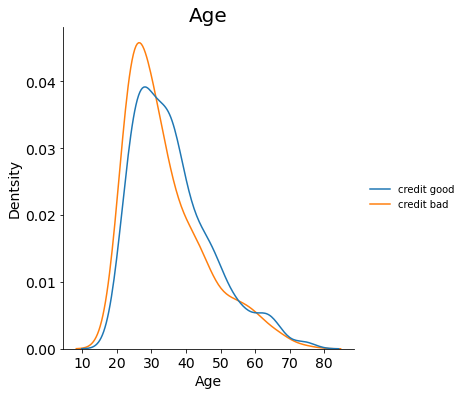

In [31]:
sns.displot(
    {
        "credit good": df[df.credit_risk == "good"].age,
        "credit bad": df[df.credit_risk == "bad"].age
    },
    kind="kde",
    common_norm=False
)

plt.title('Age', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [32]:
df.groupby('credit_risk')['age'].median()

credit_risk
bad     31.0
good    34.0
Name: age, dtype: float64

In [33]:
df.groupby('credit_risk')['age'].mean()

credit_risk
bad     33.96
good    36.22
Name: age, dtype: float64

In [34]:
df.groupby('credit_risk')['age'].apply(lambda x: x.value_counts().index[0]).reset_index() #мода

,credit_risk,age
0,bad,24
1,good,27


## **Вывод: разница в среднем 2-3 года, вполне себе есть вероятность, что возраст вносит свой вклад в решение. Однако в целом не сильно влияет.**

# 2. **Работа**

### **Интересно посмотреть средний возраст в каждой категории работ.**

In [35]:
df.groupby('job')['age'].median()

job
manager/self-empl./highly qualif. employee    36.0
skilled employee/official                     32.0
unemployed/unskilled - non-resident           32.0
unskilled - resident                          35.0
Name: age, dtype: float64

### **Возраст практически одинаковый от 32 до 36 лет.**

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 <a list of 8 Text major ticklabel objects>)

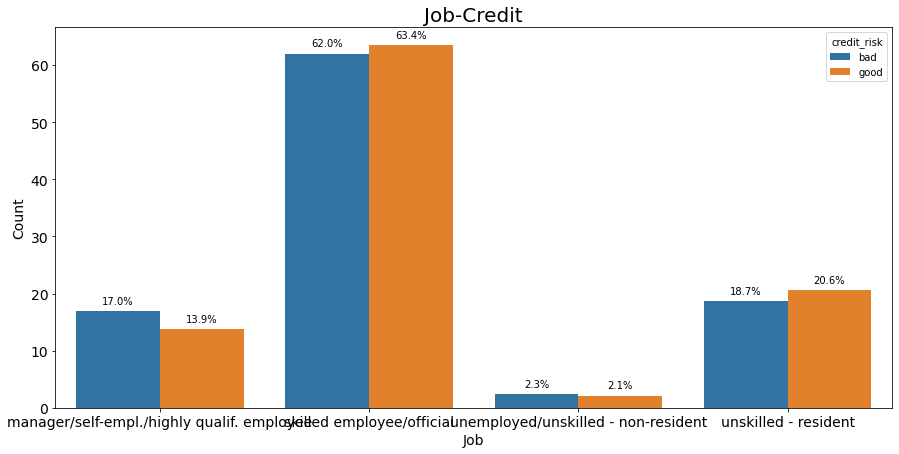

In [42]:
plt.figure(figsize=(15, 7))

job_risk = (df.groupby(['credit_risk'])['job']
                       .value_counts(normalize=True)
                       .rename('percentage')
                       .mul(100)
                       .reset_index()
                       .sort_values('job')
)
ax = sns.barplot(x="job", y="percentage", hue="credit_risk", data=job_risk)

for p in ax.patches:
  percentage = '{:.1f}%'.format(p.get_height())
  ax.annotate(percentage, 
              (p.get_x() + p.get_width() / 2., p.get_height()),
              ha='center',
              va='center',
              xytext=(0,10),
              textcoords='offset points',
              )
  
plt.title('Job-Credit', fontsize=20)
plt.xlabel('Job', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

### **Во всех категориях разница не сильно большая 2% и меньше.**
### **Интересно, что отказов в категории менеджеров, препринимателей и тд. больше, чем в остальных категориях, относительно соотношения хороших и плохих заемщиков.**

# **3. Сумма кредита**

(array([0.0e+00, 5.0e-05, 1.0e-04, 1.5e-04, 2.0e-04, 2.5e-04, 3.0e-04]),
 <a list of 7 Text major ticklabel objects>)

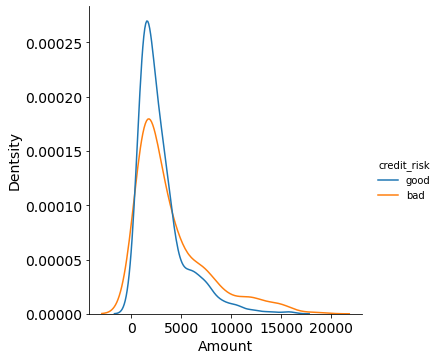

In [37]:
sns.displot(df, x='amount', hue='credit_risk', kind='kde', common_norm=False)

plt.xlabel('Amount', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [38]:
df.groupby('credit_risk')['amount'].mean()

credit_risk
bad     3938.126667
good    2985.442857
Name: amount, dtype: float64

In [39]:
df.groupby('credit_risk')['amount'].median()

credit_risk
bad     2574.5
good    2244.0
Name: amount, dtype: float64

## **Вывод: сложно сказать, на графике большинство хороших заемщиков с такой же суммой как у плохих. Среднее и медиана говорят, что сумма у хороших все-таки меньше, чем у плохих.**

# **4. Продолжительность занятости**

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 <a list of 9 Text major ticklabel objects>)

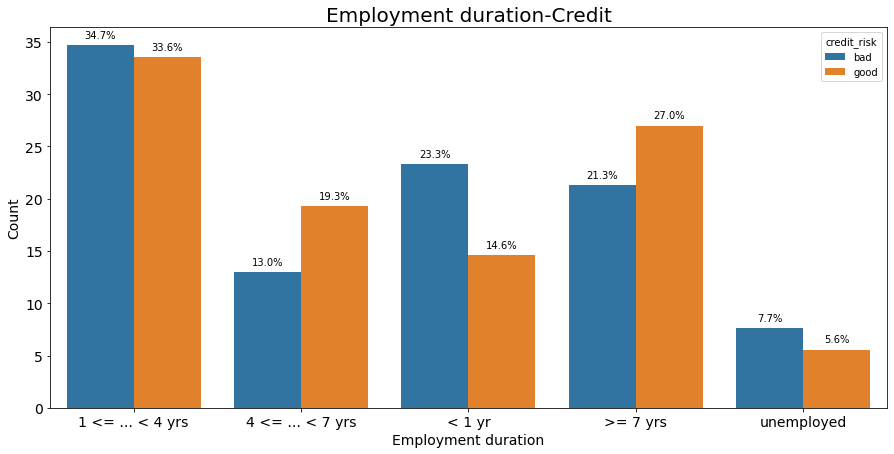

In [45]:
plt.figure(figsize=(15, 7))

employment_risk = (df.groupby(['credit_risk'])['employment_duration']
                       .value_counts(normalize=True)
                       .rename('percentage')
                       .mul(100)
                       .reset_index()
                       .sort_values('employment_duration')
)
ax = sns.barplot(x="employment_duration", y="percentage", hue="credit_risk", data=employment_risk)

for p in ax.patches:
  percentage = '{:.1f}%'.format(p.get_height())
  ax.annotate(percentage, 
              (p.get_x() + p.get_width() / 2., p.get_height()),
              ha='center',
              va='center',
              xytext=(0,10),
              textcoords='offset points',
              )
  
plt.title('Employment duration-Credit', fontsize=20)
plt.xlabel('Employment duration', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

## **Вывод: Заемщикам с опытом работы больше 4 лет, вероятнее чаще одобряют кредит, разница ~6% и в категории от 4 до 7, и в 7+.**

# **5.Собственное жилье**

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text major ticklabel objects>)

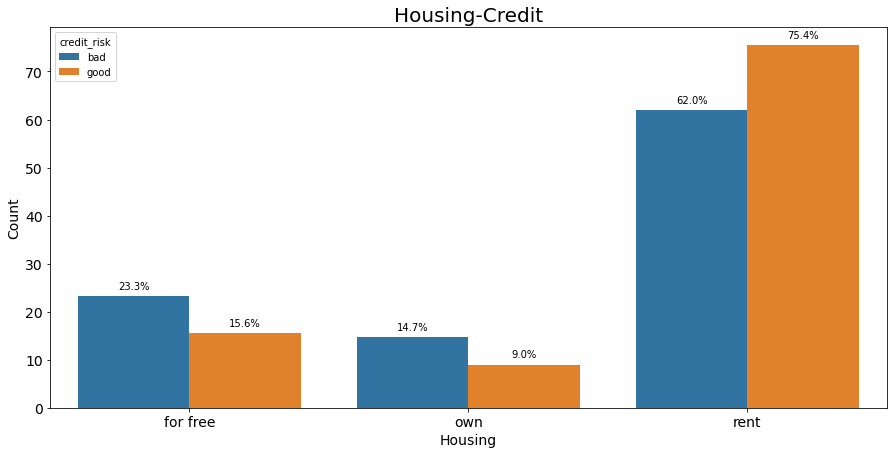

In [47]:
plt.figure(figsize=(15, 7))

housing_risk = (df.groupby(['credit_risk'])['housing']
                       .value_counts(normalize=True)
                       .rename('percentage')
                       .mul(100)
                       .reset_index()
                       .sort_values('housing')
)
ax = sns.barplot(x="housing", y="percentage", hue="credit_risk", data=housing_risk)

for p in ax.patches:
  percentage = '{:.1f}%'.format(p.get_height())
  ax.annotate(percentage, 
              (p.get_x() + p.get_width() / 2., p.get_height()),
              ha='center',
              va='center',
              xytext=(0,10),
              textcoords='offset points',
              )
  
plt.title('Housing-Credit', fontsize=20)
plt.xlabel('Housing', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

## **Вывод: нет, все-таки людям с собственным жильем даже чаще не одобряют, чем одобряют кредит. Людей с арендным жильем больше и вероятность одобрить кредит на ~13% больше.**

# **6. Сбережения**

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 <a list of 7 Text major ticklabel objects>)

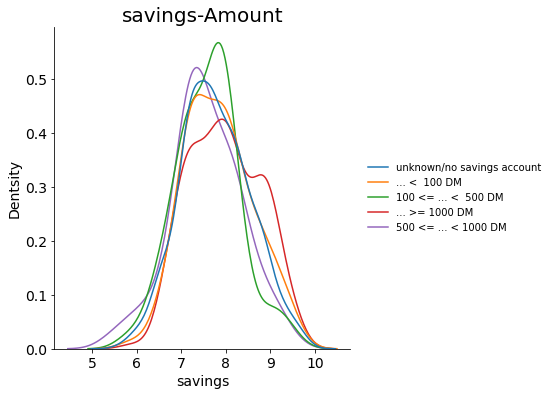

In [51]:
df_savings_amount = df.copy()
df_savings_amount.amount = np.log(df.amount+1)

sns.displot (
    {
    'unknown/no savings account': df_savings_amount[df_savings_amount.savings == 'unknown/no savings account'].amount,
    '... <  100 DM': df_savings_amount[df_savings_amount.savings == '... <  100 DM'].amount,
    '100 <= ... <  500 DM': df_savings_amount[df_savings_amount.savings == '100 <= ... <  500 DM'].amount,
    '... >= 1000 DM': df_savings_amount[df_savings_amount.savings == '... >= 1000 DM'].amount,
     '500 <= ... < 1000 DM': df_savings_amount[df_savings_amount.savings == '500 <= ... < 1000 DM'].amount
    },
    kind="kde",
    common_norm=False
)

plt.title('savings-Amount', fontsize=20)
plt.xlabel('savings', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [53]:
df.groupby('savings')['amount'].mean()

savings
... <  100 DM                 3384.038835
... >= 1000 DM                3906.409836
100 <= ... <  500 DM          2572.095238
500 <= ... < 1000 DM          2573.395833
unknown/no savings account    3187.817579
Name: amount, dtype: float64

In [55]:
df.groupby('savings')['amount'].median()

savings
... <  100 DM                 2463.0
... >= 1000 DM                2859.0
100 <= ... <  500 DM          2326.0
500 <= ... < 1000 DM          1587.0
unknown/no savings account    2238.0
Name: amount, dtype: float64

### **Здесь показана зависимость суммы сбережений и количество денег в кредит. Интересно, что при маленьких сбережениях люди берут практически такой же кредит, как и люди с бОльшими сбережениями.**

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text major ticklabel objects>)

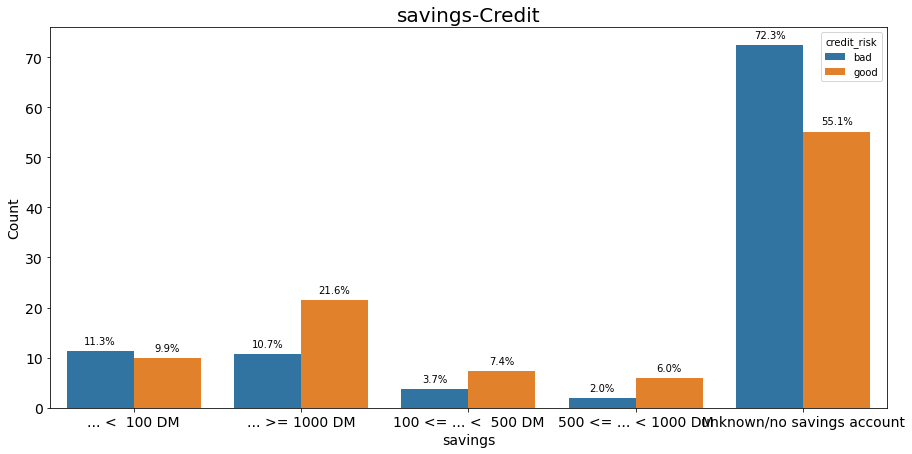

In [52]:
plt.figure(figsize=(15, 7))

savings_risk = (df.groupby(['credit_risk'])['savings']
                       .value_counts(normalize=True)
                       .rename('percentage')
                       .mul(100)
                       .reset_index()
                       .sort_values('savings')
)
ax = sns.barplot(x="savings", y="percentage", hue="credit_risk", data=savings_risk)

for p in ax.patches:
  percentage = '{:.1f}%'.format(p.get_height())
  ax.annotate(percentage, 
              (p.get_x() + p.get_width() / 2., p.get_height()),
              ha='center',
              va='center',
              xytext=(0,10),
              textcoords='offset points',
              )
  
plt.title('savings-Credit', fontsize=20)
plt.xlabel('savings', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

## **Вывод: людям с количеством сбережений меньше 100 DM меньше вероятность получить кредит.**

## **7. Сущетствующие кредиты**

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 <a list of 7 Text major ticklabel objects>)

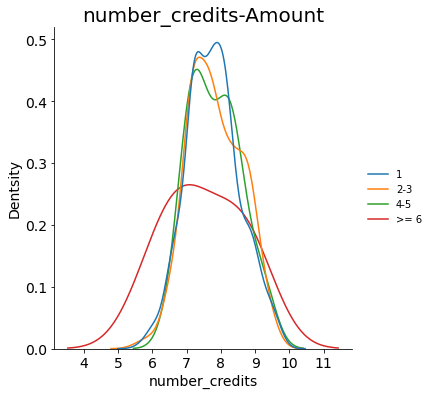

In [57]:
df_number_credits_amount = df.copy()
df_number_credits_amount.amount = np.log(df.amount+1)

sns.displot (
    {
    '1': df_number_credits_amount[df_number_credits_amount.number_credits == '1'].amount,
    '2-3': df_number_credits_amount[df_number_credits_amount.number_credits == '2-3'].amount,
    '4-5': df_number_credits_amount[df_number_credits_amount.number_credits == '4-5'].amount,
    '>= 6': df_number_credits_amount[df_number_credits_amount.number_credits == '>= 6'].amount,
    },
    kind="kde",
    common_norm=False
)

plt.title('number_credits-Amount', fontsize=20)
plt.xlabel('number_credits', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

### **Хотелось посмотреть, зависит ли сумма кредита от количсетво по счету кредита, но этот график явно не отображает зависимость.**


(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 <a list of 8 Text major ticklabel objects>)

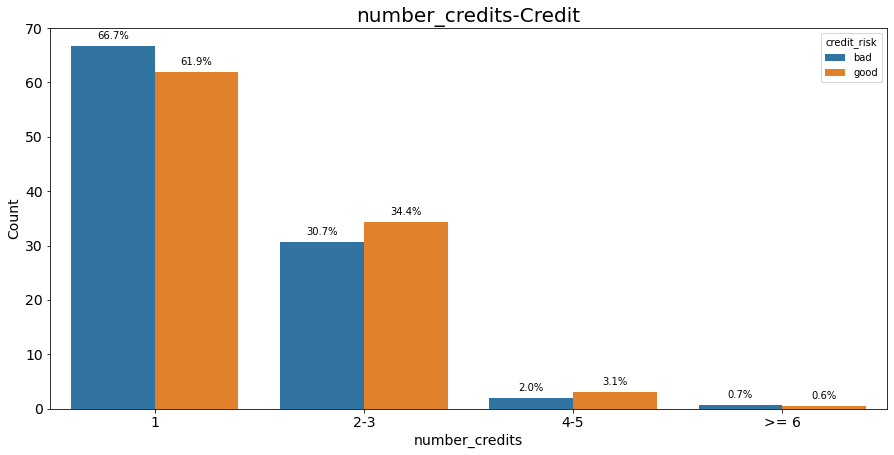

In [61]:
plt.figure(figsize=(15, 7))

number_credits_risk = (df.groupby(['credit_risk'])['number_credits']
                       .value_counts(normalize=True)
                       .rename('percentage')
                       .mul(100)
                       .reset_index()
                       .sort_values('number_credits')
)
ax = sns.barplot(x="number_credits", y="percentage", hue="credit_risk", data=number_credits_risk)

for p in ax.patches:
  percentage = '{:.1f}%'.format(p.get_height())
  ax.annotate(percentage, 
              (p.get_x() + p.get_width() / 2., p.get_height()),
              ha='center',
              va='center',
              xytext=(0,10),
              textcoords='offset points',
              )
  
plt.title('number_credits-Credit', fontsize=20)
plt.xlabel('number_credits', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

## **Вывод: людей у которых это первый кредит больше и вероятность, что им его одобрят меньше.**

# **8. Длительность кредита**

In [68]:
df.groupby('credit_risk')['duration'].median()

credit_risk
bad     24.0
good    18.0
Name: duration, dtype: float64

In [69]:
df.groupby('credit_risk')['duration'].mean()

credit_risk
bad     24.860000
good    19.207143
Name: duration, dtype: float64

In [71]:
df.groupby('credit_risk')['duration'].apply(lambda x: x.value_counts().index[0]).reset_index() #мода

,credit_risk,duration
0,bad,24
1,good,12


## **Вывод: чем меньше срок заема, тем вероятнее получить одобрение кредита.**

# **9. Кредитная история**

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text major ticklabel objects>)

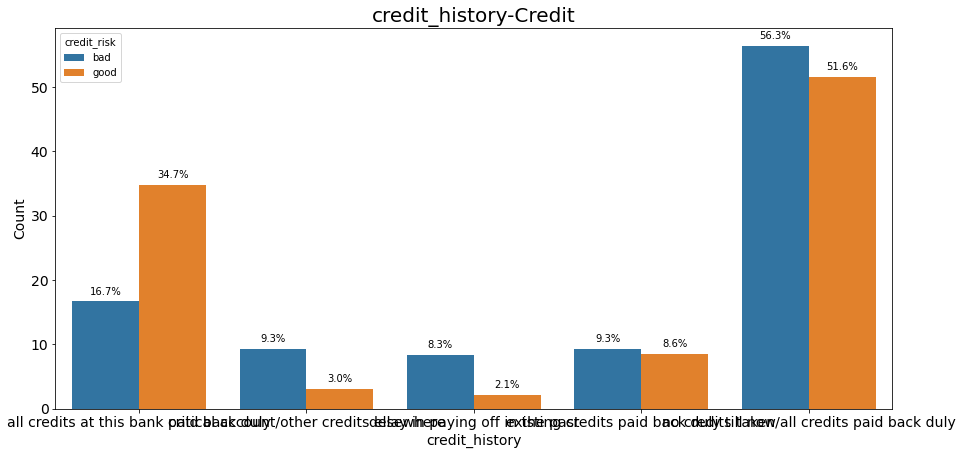

In [74]:
plt.figure(figsize=(15, 7))

credit_history_risk = (df.groupby(['credit_risk'])['credit_history']
                       .value_counts(normalize=True)
                       .rename('percentage')
                       .mul(100)
                       .reset_index()
                       .sort_values('credit_history')
)
ax = sns.barplot(x="credit_history", y="percentage", hue="credit_risk", data=credit_history_risk)

for p in ax.patches:
  percentage = '{:.1f}%'.format(p.get_height())
  ax.annotate(percentage, 
              (p.get_x() + p.get_width() / 2., p.get_height()),
              ha='center',
              va='center',
              xytext=(0,10),
              textcoords='offset points',
              )
  
plt.title('credit_history-Credit', fontsize=20)
plt.xlabel('credit_history', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [75]:
df['credit_history'].unique()

array(['all credits at this bank paid back duly',
       'no credits taken/all credits paid back duly',
       'existing credits paid back duly till now',
       'delay in paying off in the past',
       'critical account/other credits elsewhere'], dtype=object)

## **Вывод: вероятнее всего заемщику одобрят кредит, если у него хорошая история в этом банкею. Однако, если кредиты были погашены вовремя, но в другом банке или не были взяты когда-либо в принципе, то вероятность получить кредит уменьшается.**

# **10. Иностранец**

In [78]:
df.groupby('credit_risk')['foreign_worker'].count()

credit_risk
bad     300
good    700
Name: foreign_worker, dtype: int64

In [85]:
df.groupby('job')['foreign_worker'].count()

job
manager/self-empl./highly qualif. employee    148
skilled employee/official                     630
unemployed/unskilled - non-resident            22
unskilled - resident                          200
Name: foreign_worker, dtype: int64

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 <a list of 8 Text major ticklabel objects>)

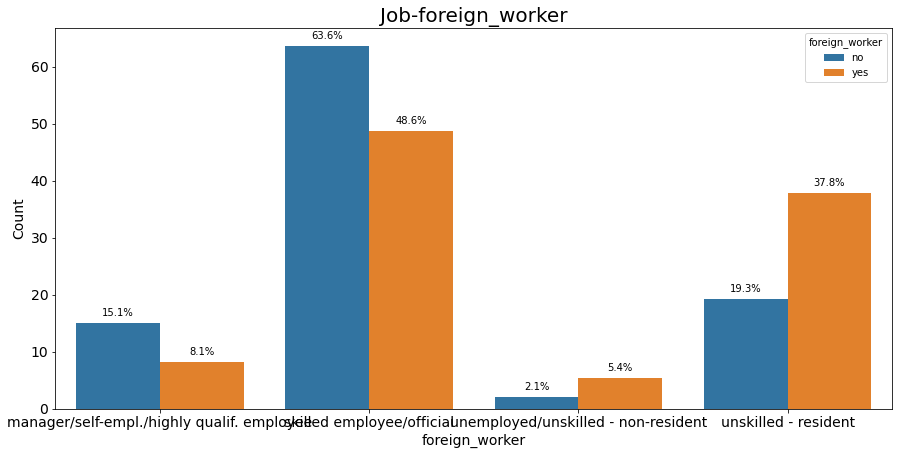

In [84]:
plt.figure(figsize=(15, 7))

job_foreign_worker = (df.groupby(['foreign_worker'])['job']
                       .value_counts(normalize=True)
                       .rename('percentage')
                       .mul(100)
                       .reset_index()
                       .sort_values('job')
)
ax = sns.barplot(x="job", y="percentage", hue="foreign_worker", data=job_foreign_worker)

for p in ax.patches:
  percentage = '{:.1f}%'.format(p.get_height())
  ax.annotate(percentage, 
              (p.get_x() + p.get_width() / 2., p.get_height()),
              ha='center',
              va='center',
              xytext=(0,10),
              textcoords='offset points',
              )
  
plt.title('Job-foreign_worker', fontsize=20)
plt.xlabel('foreign_worker', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

## **Вывод: Странно, что большинству работающим иностранцам не выдают кредит, а не работающим или просто проживающим на территории без скиллов одобряют кредит. Абсолютно не исключено, что я ошибаюсь, так как это поверхностный анализ.**

# **Попробуем обучить какую-нибудь модельку**

## **Для начала применим one-hot кодирование для качественных признаков**

### **One-hot кодирование не самый эффективный способ предобработки данных, мы осложяем работу для некоторых моделей в плане скорости, увеличив признаки, однако это все же зачастую качественнее, чем label-encoding.**

In [86]:
dummy_features = pd.get_dummies(categorical_data, drop_first=True)
dummy_features

,status_... >= 200 DM / salary for at least 1 year,status_0<= ... < 200 DM,status_no checking account,credit_history_critical account/other credits elsewhere,credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/all credits paid back duly,purpose_car (new),purpose_car (used),purpose_domestic appliances,...,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,number_credits_2-3,number_credits_4-5,number_credits_>= 6,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident
0,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
996,0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
997,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
998,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0


## **Поработаем над бинарными данными**

In [87]:
cleanup_binary = {"people_liable":     {"0 to 2": 0, "3 or more": 1},
                "telephone": {"no": 0, "yes (under customer name)": 1},
                "foreign_worker": {"no": 0, "yes": 1},
                "credit_risk": {"bad": 0, "good": 1}
                }

In [88]:
binary_data = binary_data.replace(cleanup_binary)
binary_data

,people_liable,telephone,foreign_worker,credit_risk
0,0,0,0,1
1,1,0,0,1
2,0,0,0,1
3,1,0,1,1
4,0,0,1,1
...,...,...,...,...
995,1,0,0,0
996,0,0,0,0
997,0,1,0,0
998,0,1,0,0


## **Объединим проработанные данные**

In [89]:
X = pd.concat([numeric_data, dummy_features, binary_data], axis=1)
X_origin = df.iloc[::] #сохраним на всякий случай оригинал в эту переменную
X.head(20)

,duration,amount,age,status_... >= 200 DM / salary for at least 1 year,status_0<= ... < 200 DM,status_no checking account,credit_history_critical account/other credits elsewhere,credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/all credits paid back duly,...,number_credits_2-3,number_credits_4-5,number_credits_>= 6,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident,people_liable,telephone,foreign_worker,credit_risk
0,18,1049,21,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,9,2799,36,0,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
2,12,841,23,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,12,2122,39,0,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,1,1
4,12,2171,38,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
5,10,2241,48,0,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,1,1
6,8,3398,39,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
7,6,1361,40,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1
8,18,1098,65,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
9,24,3758,23,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [91]:
X.shape, X_origin.shape #cравним новые и старые данные по размеру

((1000, 55), (1000, 21))

## **Разделяем данные на тестовую и обучающую выборки**

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
y = X['credit_risk'] #наш таргет
y

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: credit_risk, Length: 1000, dtype: int64

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values,
                                                    train_size=0.8,
                                                    random_state=42)

## **Подбираем параметры**

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [96]:
def search_and_draw(X, y, model, param_name, grid, param_scale='ordinary', draw=True):
    parameters = {param_name: grid}
    
    CV_model = GridSearchCV(estimator=model, 
                            param_grid=parameters,
                            cv=5, 
                            scoring='f1',
                            n_jobs=-1, 
                            verbose=10)
    CV_model.fit(X, y)
    means = CV_model.cv_results_['mean_test_score']
    error = CV_model.cv_results_['std_test_score']
    
    if draw:
        plt.figure(figsize=(15,8))
        plt.title('choose ' + param_name)


        if (param_scale == 'log'):
            plt.xscale('log')

        plt.plot(grid, means, label='mean values of score', color='red', lw=3)

        plt.fill_between(grid, means - 2 * error, means + 2 * error, 
                         color='green', label='filled area between errors', alpha=0.5)
        legend_box = plt.legend(framealpha=1).get_frame()
        legend_box.set_facecolor("white")
        legend_box.set_edgecolor("black")
        plt.xlabel('parameter')
        plt.ylabel('roc_auc')
        plt.show()
        
    return means, error

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## **Пробуем модель ближайших соседей и деревья**

In [103]:
models = [KNeighborsClassifier(), DecisionTreeClassifier()]
param_names = ['n_neighbors', 'max_depth']
grids = [np.array(np.linspace(4, 50, 20), dtype='int'), np.arange(1, 30)]
param_scales = ['log', 'ordinary']

Fitting 5 folds for each of 20 candidates, totalling 100 fits


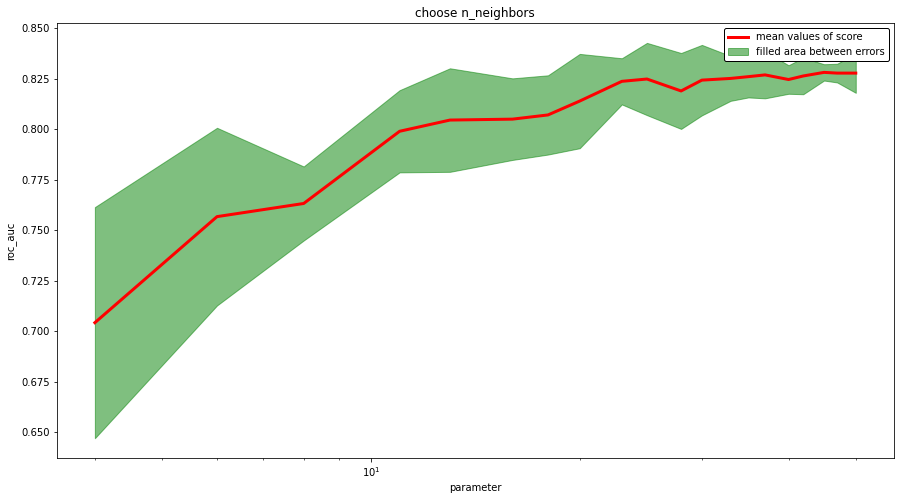

Fitting 5 folds for each of 29 candidates, totalling 145 fits


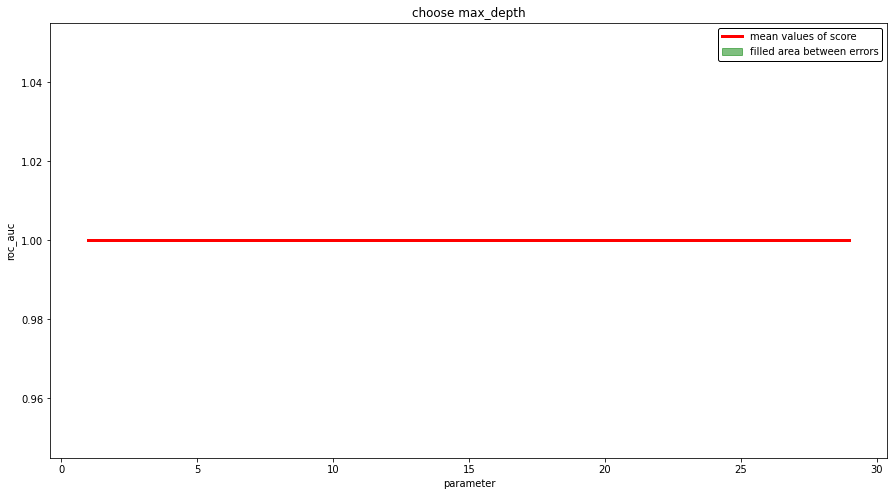

In [104]:
for model, param_name, grid, param_scale in zip(models, 
                                                param_names, 
                                                grids, 
                                                param_scales):
    search_and_draw(X_train, y_train, model, param_name, grid, param_scale)

## **Вывод: в принципе можно подобрать такой параметр, чтобы быть наиболее точным в алгоритме к-ближайших соседей. Во втором графике нечто странное, где-то, видимо, ошибка.**

# **Алгоритм случайного леса**

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from tqdm.notebook import tqdm

In [106]:
max_trees = 100

values = np.arange(max_trees) + 1

kf = KFold(n_splits=5, shuffle=True, random_state=1234)

global_scores = []

for train_indices, val_indices in tqdm(kf.split(X_train), total=5):
    scores = []
    
    X_train_kf = X_train[train_indices]
    y_train_kf = y_train[train_indices]
    
    X_val_kf = X_train[val_indices]
    y_val_kf = y_train[val_indices]
    
    forest = RandomForestClassifier(n_estimators=max_trees)
    forest.fit(X_train_kf, y_train_kf)
    trees = forest.estimators_
    
    for number_of_trees in tqdm(values, leave=False):
        thinned_forest = RandomForestClassifier(n_estimators=number_of_trees)
        
        thinned_forest.n_classes_ = 2
        thinned_forest.estimators_ = trees[:number_of_trees]

        scores.append(roc_auc_score(y_val_kf, thinned_forest.predict_proba(X_val_kf)[:, 1]))
    
    scores = np.array(scores)
    
    global_scores.append(scores)

global_scores = np.stack(global_scores, axis=0)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

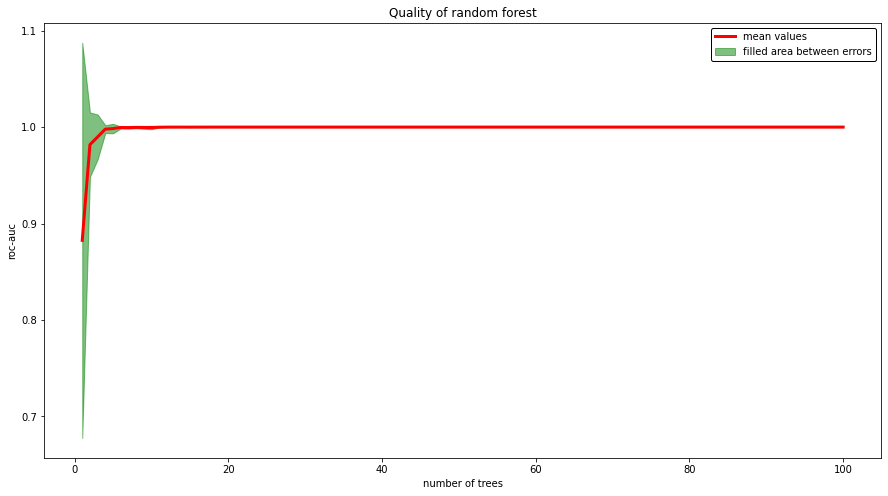

In [108]:
mean_cross_val_score = global_scores.mean(axis=0)
std_cross_val_score = global_scores.std(axis=0)

plt.figure(figsize=(15,8))
plt.title('Quality of random forest')

plt.plot(values, mean_cross_val_score, label='mean values', color='red', lw=3)
plt.fill_between(values, 
                 mean_cross_val_score - 2 * std_cross_val_score, 
                 mean_cross_val_score + 2 * std_cross_val_score, 
                 color='green', 
                 label='filled area between errors',
                 alpha=0.5)
legend_box = plt.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.xlabel('number of trees')
plt.ylabel('roc-auc')

plt.show()

## **Вывод: опять что-то мега странное, ну допустим, что все вот так вот идеально и возьмем эту модель..**

In [110]:
model = RandomForestClassifier(n_estimators=50, n_jobs=-1)

model.fit(X_train, y_train)
y_train_predicted = model.predict_proba(X_train)[:, 1]
y_test_predicted = model.predict_proba(X_test)[:, 1]

In [111]:
from sklearn.metrics import roc_auc_score, roc_curve

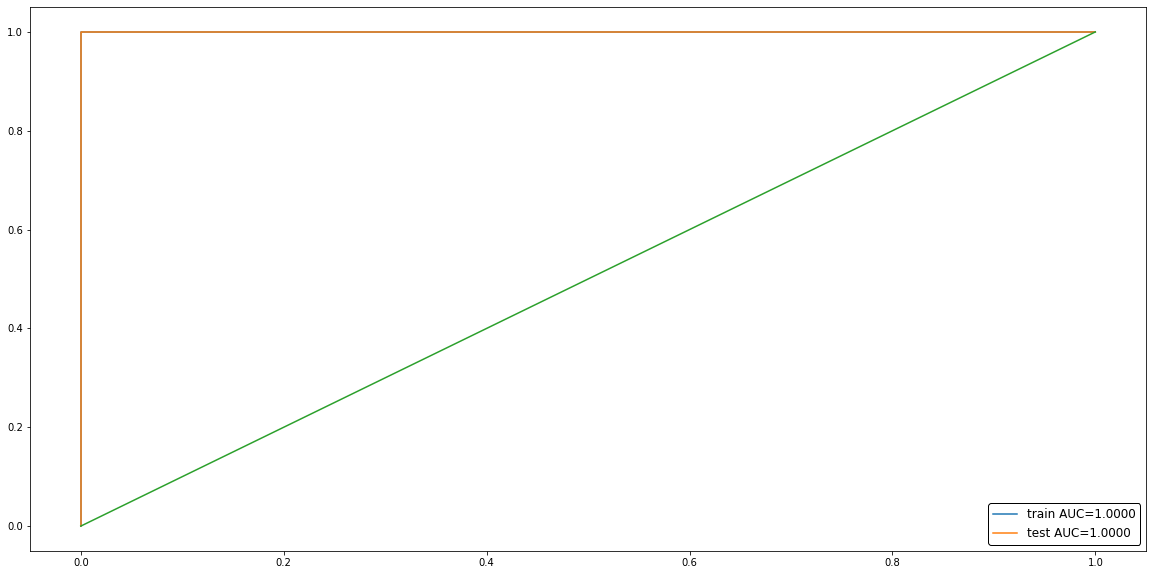

In [112]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(20,10))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

## **Все очень идеально, мы в идеальном мире с:**

# **Логистическую регрессию еще напоследок попробуем**

In [113]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_score = lr.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [114]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss
print('roc-auc:', roc_auc_score(y_test, y_score))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('logloss:', log_loss(y_test, y_pred))

roc-auc: 1.0
precision: 1.0
recall: 0.9927536231884058
f1: 0.9963636363636363
logloss: 0.17269388197455446


# **roc-auc и precision равны единице, невероятный результат**